# Sentiment analysis for stock price prediction (Amazon) 

Efficient Market Hypothesis is the popular theory about stock prediction. With its failure much research has been carried in the area of prediction of stocks. This project is about taking non quantifiable data such as financial news articles about a company and predicting its future stock trend with news sentiment classification. Assuming that news articles have impact on stock market, this is an attempt to study relationship between news and stock trend.

This research follows the Fundamental analysis technique to discover future trend of a stock by considering news articles about a company as prime information and tries to classify news as good (positive) and bad (negative). If the news sentiment is positive, there are more chances that the stock price will go up and if the news sentiment is negative, then stock price may go down. This study is an attempt to build a model that predicts news polarity which may affect changes in stock trends. In other words, check the impact of news articles on stock prices. We are using supervised machine learning as classification and other text mining techniques to check news polarity. And also be able to classify unknown news, which is not used to build a
classifier.


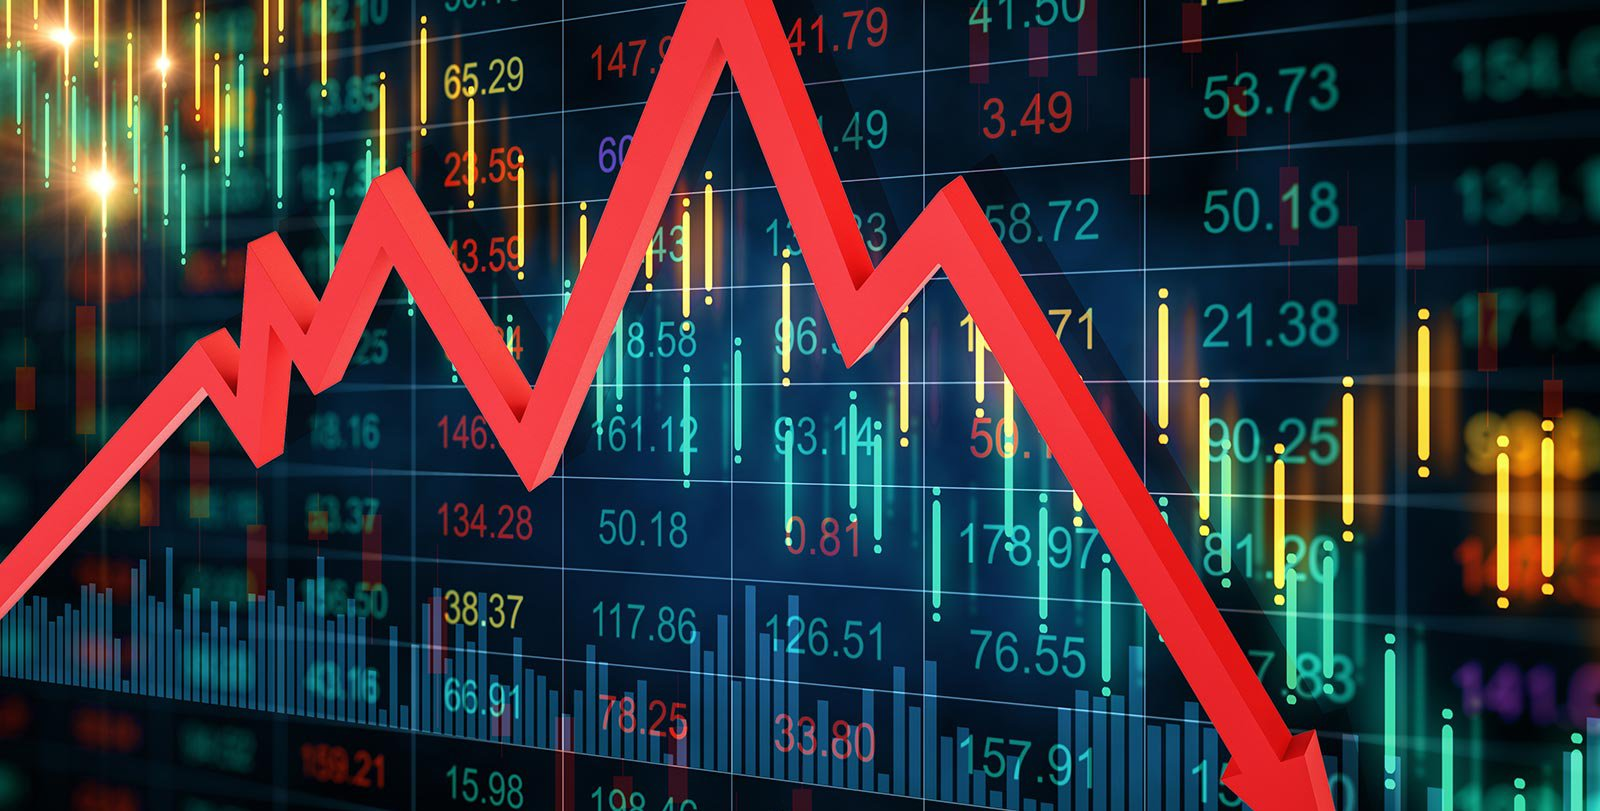


For this demonstration exercise, we’ll use the closing prices of Apple, Tesla, Amazon and Google's stock from the past year. Analysis data will be loaded from finnhub, which offers a free API for historical and real-time stock market data. 


In [1]:
# import necessaty modules
import finnhub
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
from datetime import datetime
import json
import ast
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#creating an empty dataframe
df = pd.DataFrame(columns=['Date','Ticker', 'Headline'])

In [4]:
#checkking the dataframe
df

,Date,Ticker,Headline


## Data Extraction and Preparation

Finnhub is a source of financial data. Out of all the places that offer a free version access, this is the most complete. Whether you are a data-driven fundamental investor, a crypto guru or a curious mind interested in gathering financial and economic data, this is the right place for you to start.

An API key is required as it is a unique code that is passed in to an API to identify the user making the API call.

The Finnhub Stock API has many different API endpoints, and I have selected a subset of three endpoint categories to analyze that are available on the free version of the API:

Stock Fundamentals: Company Profile, Company News, News Sentiment, Peers, Basic Financials

Stock Estimates: Price Target, Recommendation Trends, Earnings Surprises

Importing the requests module will allow you to send HTTP requests and retrieve a response object containing your response data

Importing the json module will allow you to load your response data in a structured way to parse through it

Importing the pprint module will allow you to pretty-print your data structures in a more readable way

In [55]:
# tickers for the stocks to extract
ticker = ['AAPL','TSLA','AMZN','GOOGL']

# iterating through for loop and json to extract the news headlines
for tick in ticker:
    # month numbers for the years
    l = ['01','02'] #2022
    l = ['03','04','05','06','07','08','09','10','11','12'] #2021
    
    for i in l:
        # url with id and token
        url = 'https://finnhub.io/api/v1/company-news?symbol='+tick+'&from=2022-'+i+ '-01&to=2022-'+ i+ '-28&token=**************'
        print (url)  
        req = requests.request("GET",url = url)
        print(req)
        a = req.json()
        len(a)
        for k in range(len(a)):
            # appending the extracted news headlines in to the empty dataframe
            df = df.append({'Date': a[k]['datetime'], 'Ticker': tick,'Headline': a[k]['headline']}, ignore_index=True)

In [24]:
# checking the dataframe
df

,Date,Ticker,Headline
0,1616973960,AAPL,Apple Rolls Out Another Update To Fix 'Activel...
1,1616958359,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G
2,1616957269,AAPL,The XSD ETF: Semiconductors Rule!
3,1616955435,AAPL,Analysts Are Bullish But Traders Are Bearish O...
4,1616955089,AAPL,Look To Main Street For Safer Investing Ideas ...
...,...,...,...
10722,1645489275,GOOGL,Meta Platforms: This Is Not A Melting Ice Cube
10723,1645489118,GOOGL,When Bubbles Pop The Crash Is Only Beginning
10724,1645488000,GOOGL,Users should be allowed to sue U.S. tech giant...
10725,1645485634,GOOGL,Tracking Al Gore's Generation Investment Manag...


In [30]:
#converting the index to datetime
def convert_to_date(x):
    t = datetime.fromtimestamp(x)
    return (t)  

In [51]:
df['Date'] = df['Date'].apply(convert_to_date)

In [53]:
# saving the dataframe in to csv file
df.to_csv('stock_data.csv')

In [61]:
df

,Date,Ticker,Headline
0,2021-03-28 18:26:00,AAPL,Apple Rolls Out Another Update To Fix 'Activel...
1,2021-03-28 14:05:59,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G
2,2021-03-28 13:47:49,AAPL,The XSD ETF: Semiconductors Rule!
3,2021-03-28 13:17:15,AAPL,Analysts Are Bullish But Traders Are Bearish O...
4,2021-03-28 13:11:29,AAPL,Look To Main Street For Safer Investing Ideas ...
...,...,...,...
10722,2022-02-21 18:21:15,GOOGL,Meta Platforms: This Is Not A Melting Ice Cube
10723,2022-02-21 18:18:38,GOOGL,When Bubbles Pop The Crash Is Only Beginning
10724,2022-02-21 18:00:00,GOOGL,Users should be allowed to sue U.S. tech giant...
10725,2022-02-21 17:20:34,GOOGL,Tracking Al Gore's Generation Investment Manag...


In [26]:
# reading the csv file
headlines = pd.read_csv('stock_data.csv',index_col=0)

In [27]:
headlines.head()

,Date,Ticker,Headline
0,2021-03-28 18:26:00,AAPL,Apple Rolls Out Another Update To Fix 'Activel...
1,2021-03-28 14:05:59,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G
2,2021-03-28 13:47:49,AAPL,The XSD ETF: Semiconductors Rule!
3,2021-03-28 13:17:15,AAPL,Analysts Are Bullish But Traders Are Bearish O...
4,2021-03-28 13:11:29,AAPL,Look To Main Street For Safer Investing Ideas ...


## FINBERT

FinBERT sentiment analysis model is now available on Hugging Face model hub. FinBERT is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification

In [4]:
# importing necessary modules
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [5]:
# creating an instance of a pipeline and downloading the finbert model from huggingface
from transformers import pipeline

classifier_ProsusAI_finbert = pipeline('sentiment-analysis', model='ProsusAI/finbert')

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [6]:
len(headlines)

10727

In [16]:
headlines.loc[0,'Headline']

"Apple Rolls Out Another Update To Fix 'Actively Exploited' WebKit Vulnerability In iPhone, iPad, and Watch Devices"

In [18]:
# getting sentiment classification
classified_sentiment_Finbert = []

for row in range(len(headlines)):
    classified_sentiment_Finbert.append(classifier_ProsusAI_finbert(headlines.loc[row,'Headline']))
    
headlines['classified_sentiment'] = classified_sentiment_Finbert

In [22]:
headlines['classified_sentiment']

0        [{'label': 'neutral', 'score': 0.3681025803089...
1        [{'label': 'neutral', 'score': 0.8281659483909...
2        [{'label': 'neutral', 'score': 0.9291386008262...
3        [{'label': 'neutral', 'score': 0.6354793310165...
4        [{'label': 'neutral', 'score': 0.7519547343254...
                               ...                        
10722    [{'label': 'neutral', 'score': 0.9326495528221...
10723    [{'label': 'neutral', 'score': 0.9242005348205...
10724    [{'label': 'negative', 'score': 0.564744472503...
10725    [{'label': 'neutral', 'score': 0.9386319518089...
10726    [{'label': 'neutral', 'score': 0.8945209383964...
Name: classified_sentiment, Length: 10727, dtype: object

In [23]:
# saving the dataframe in to csv
headlines.to_csv('finbert.csv')

In [101]:
finbert = pd.read_csv('finbert.csv',index_col=0)

In [102]:
finbert

,Date,Ticker,Headline,classified_sentiment
0,2021-03-28 18:26:00,AAPL,Apple Rolls Out Another Update To Fix 'Activel...,"[{'label': 'neutral', 'score': 0.3681025803089..."
1,2021-03-28 14:05:59,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G,"[{'label': 'neutral', 'score': 0.8281659483909..."
2,2021-03-28 13:47:49,AAPL,The XSD ETF: Semiconductors Rule!,"[{'label': 'neutral', 'score': 0.9291386008262..."
3,2021-03-28 13:17:15,AAPL,Analysts Are Bullish But Traders Are Bearish O...,"[{'label': 'neutral', 'score': 0.6354793310165..."
4,2021-03-28 13:11:29,AAPL,Look To Main Street For Safer Investing Ideas ...,"[{'label': 'neutral', 'score': 0.7519547343254..."
...,...,...,...,...
10722,2022-02-21 18:21:15,GOOGL,Meta Platforms: This Is Not A Melting Ice Cube,"[{'label': 'neutral', 'score': 0.9326495528221..."
10723,2022-02-21 18:18:38,GOOGL,When Bubbles Pop The Crash Is Only Beginning,"[{'label': 'neutral', 'score': 0.9242005348205..."
10724,2022-02-21 18:00:00,GOOGL,Users should be allowed to sue U.S. tech giant...,"[{'label': 'negative', 'score': 0.564744472503..."
10725,2022-02-21 17:20:34,GOOGL,Tracking Al Gore's Generation Investment Manag...,"[{'label': 'neutral', 'score': 0.9386319518089..."


In [140]:
# extracting the sentiment and the score from the dictonary
label = []
score = []
for i in range(len(finbert)):
    a=(ast.literal_eval(finbert.loc[i,'classified_sentiment']))
    label.append(a[0]['label'])
    score.append(a[0]['score'])

In [141]:
# appending the columns in to the dataframe
finbert['label'] = label
finbert['score'] = score

In [145]:
finbert = finbert.drop('classified_sentiment',axis = 1)

In [146]:
# checking the dataframe
finbert

,Date,Ticker,Headline,label,score
0,2021-03-28 18:26:00,AAPL,Apple Rolls Out Another Update To Fix 'Activel...,neutral,0.368103
1,2021-03-28 14:05:59,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G,neutral,0.828166
2,2021-03-28 13:47:49,AAPL,The XSD ETF: Semiconductors Rule!,neutral,0.929139
3,2021-03-28 13:17:15,AAPL,Analysts Are Bullish But Traders Are Bearish O...,neutral,0.635479
4,2021-03-28 13:11:29,AAPL,Look To Main Street For Safer Investing Ideas ...,neutral,0.751955
...,...,...,...,...,...
10722,2022-02-21 18:21:15,GOOGL,Meta Platforms: This Is Not A Melting Ice Cube,neutral,0.932650
10723,2022-02-21 18:18:38,GOOGL,When Bubbles Pop The Crash Is Only Beginning,neutral,0.924201
10724,2022-02-21 18:00:00,GOOGL,Users should be allowed to sue U.S. tech giant...,negative,0.564744
10725,2022-02-21 17:20:34,GOOGL,Tracking Al Gore's Generation Investment Manag...,neutral,0.938632


# VADER - Sentiment intensity analyzer

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

Here are the advantages of using VADER which makes a lot of things easier:

It does not require any training data.
It can very well understand the sentiment of a text containing emoticons, slangs, conjunctions, capital words, punctuations and much more.
It works excellent on social media text.
VADER can work with multiple domains.

Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will  give us scores of the following categories:

Positive
Negative
Neutral
Compound
The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

In [50]:
# importing the news headlines file
headlines = pd.read_csv('stock_data.csv',index_col=0)

In [30]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Authorized
[nltk_data]     User1\AppData\Roaming\nltk_data...


In [51]:
# examining the polarity scores for the sentence
text = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(text)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [52]:
text_2 = 'Analysts Are Bullish But Traders Are Bearish On Square'

sid.polarity_scores(text_2)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [53]:
# applying the vader sentiment intensity analyzer to the dataframe headlines column
headlines['Vader_sentiment'] = headlines['Headline'].apply(sid.polarity_scores)

In [55]:
#headlines.to_csv('vader.csv')

In [24]:
vader = pd.read_csv('vader.csv',index_col=0)

In [25]:
vader

,Date,Ticker,Headline,Vader_sentiment
0,2021-03-28 18:26:00,AAPL,Apple Rolls Out Another Update To Fix 'Activel...,"{'neg': 0.231, 'neu': 0.66, 'pos': 0.108, 'com..."
1,2021-03-28 14:05:59,AAPL,Qualcomm: Buying Into The Cornerstone Of 5G,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-03-28 13:47:49,AAPL,The XSD ETF: Semiconductors Rule!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2021-03-28 13:17:15,AAPL,Analysts Are Bullish But Traders Are Bearish O...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-03-28 13:11:29,AAPL,Look To Main Street For Safer Investing Ideas ...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp..."
...,...,...,...,...
10722,2022-02-21 18:21:15,GOOGL,Meta Platforms: This Is Not A Melting Ice Cube,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10723,2022-02-21 18:18:38,GOOGL,When Bubbles Pop The Crash Is Only Beginning,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp..."
10724,2022-02-21 18:00:00,GOOGL,Users should be allowed to sue U.S. tech giant...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10725,2022-02-21 17:20:34,GOOGL,Tracking Al Gore's Generation Investment Manag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [26]:
#extracting the sentiment intensity
def extract(dictonary):
    a=(ast.literal_eval(dictonary)['compound'])
    return(a)

In [27]:
vader['compound'] = vader['Vader_sentiment'].apply(extract)

In [28]:
vader = vader.drop('Vader_sentiment',axis = 1) 

In [32]:
vader[vader['Ticker'] == "AMZN"]

,Date,Ticker,Headline,compound
4490,2021-03-28 19:00:00,AMZN,Amazon Decides To Bring Out The Snark On Twitt...,0.5719
4491,2021-03-28 19:00:00,AMZN,Amazon Could Unlock Up To $600B In Stock Value...,0.4767
4492,2021-03-28 19:00:00,AMZN,Jeff Bezos Asked Amazon Execs To Fight Back Ha...,-0.2263
4493,2021-03-28 17:36:00,AMZN,Shocking claims from Amazon workers,-0.2500
4494,2021-03-28 16:06:57,AMZN,Feu rouge et textos: un mouvement syndical dén...,0.0000
...,...,...,...,...
10297,2022-02-22 08:42:37,AMZN,"Read How JPMorgan Views Meta, Apple, Amazon, N...",0.1779
10298,2022-02-22 08:30:00,AMZN,Here's How Shiba Inu Can Surpass $1,0.0000
10299,2022-02-22 08:00:32,AMZN,10 Software Stocks to Sell Now According to Ca...,0.0000
10300,2022-02-22 07:15:00,AMZN,The World's Best Brands Live on the Nasdaq-100®,0.6369


In [33]:
# convertind the index in to datetime
vader['Date'] = pd.to_datetime(vader['Date'])

In [34]:
vader.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10727 entries, 0 to 10726
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10727 non-null  datetime64[ns]
 1   Ticker    10727 non-null  object        
 2   Headline  10727 non-null  object        
 3   compound  10727 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 419.0+ KB


In [35]:
# sorting the values by date
vader.sort_values(by='Date', inplace=True)

In [36]:
vader

,Date,Ticker,Headline,compound
10320,2020-06-12 14:19:32,GOOGL,3 Earnings Reports to Watch Next Week,0.0000
701,2020-06-19 05:00:00,AAPL,10 best wireless printers that will make your ...,0.7906
215,2021-03-11 19:34:00,AAPL,Apple In Lawsuit Says It 'Guards Closely' All ...,-0.3818
214,2021-03-11 21:15:04,AAPL,As The NFL Negotiates A New Partner For NFL Su...,0.1779
213,2021-03-11 23:00:00,AAPL,Stephanie Cohen,0.0000
...,...,...,...,...
10519,2022-02-28 17:45:00,GOOGL,O'Keefe Stevens Advisory Q4 2021 Update,0.0000
10518,2022-02-28 17:50:00,GOOGL,Value Stock Outperformance Might Continue,0.3400
9198,2022-02-28 17:50:00,AAPL,Value Stock Outperformance Might Continue,0.3400
10082,2022-02-28 17:50:00,AMZN,Value Stock Outperformance Might Continue,0.3400


In [37]:
vader.set_index('Date',inplace = True)

In [38]:
vader

,Ticker,Headline,compound
Date,,,
2020-06-12 14:19:32,GOOGL,3 Earnings Reports to Watch Next Week,0.0000
2020-06-19 05:00:00,AAPL,10 best wireless printers that will make your ...,0.7906
2021-03-11 19:34:00,AAPL,Apple In Lawsuit Says It 'Guards Closely' All ...,-0.3818
2021-03-11 21:15:04,AAPL,As The NFL Negotiates A New Partner For NFL Su...,0.1779
2021-03-11 23:00:00,AAPL,Stephanie Cohen,0.0000
...,...,...,...
2022-02-28 17:45:00,GOOGL,O'Keefe Stevens Advisory Q4 2021 Update,0.0000
2022-02-28 17:50:00,GOOGL,Value Stock Outperformance Might Continue,0.3400
2022-02-28 17:50:00,AAPL,Value Stock Outperformance Might Continue,0.3400


## AMAZON

In [39]:
# checking the amazon tiker
amazon = vader[vader['Ticker'] == "AMZN"][['compound']]

In [40]:
amazon

,compound
Date,
2021-03-23 16:44:55,0.1779
2021-03-23 16:45:04,0.1779
2021-03-23 17:00:55,0.1779
2021-03-23 17:13:00,0.1531
2021-03-23 17:41:17,0.7096
...,...
2022-02-28 15:39:41,-0.7184
2022-02-28 16:30:00,0.0000
2022-02-28 16:53:19,0.1779


In [41]:
amazon.resample('M', convention='end').agg({'compound': 'mean'})

,compound
Date,
2021-03-31,0.103200
2021-04-30,0.143891
2021-05-31,0.130755
2021-06-30,0.156117
2021-07-31,0.141370
2021-08-31,0.124793
2021-09-30,0.151328
2021-10-31,0.106781
2021-11-30,0.123275


<AxesSubplot:xlabel='Date'>

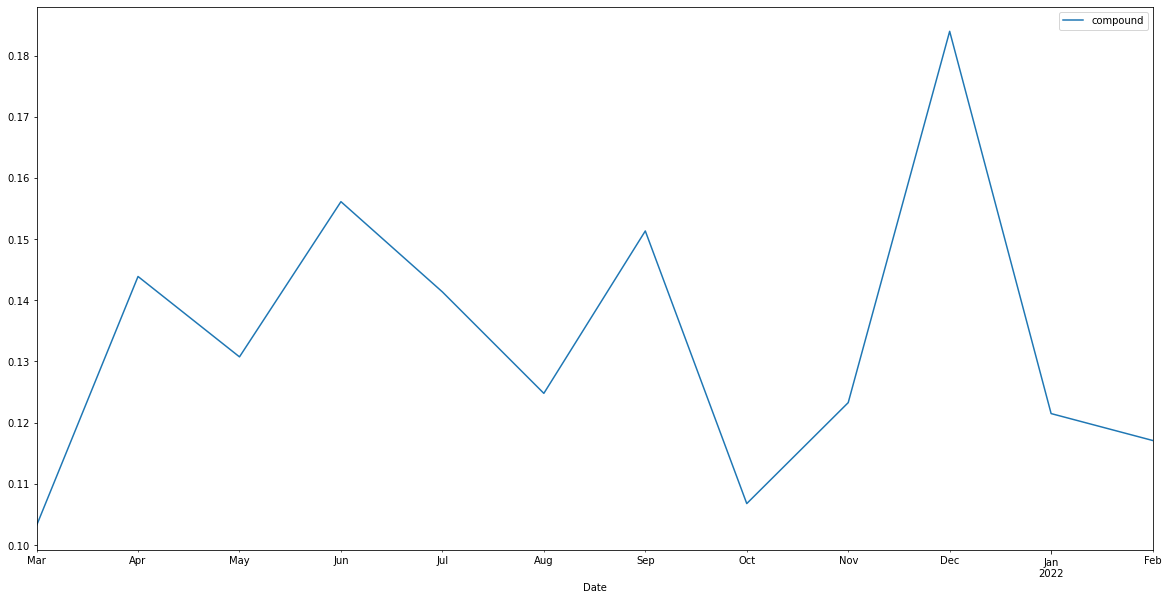

In [42]:
amazon.resample('M', convention='end').agg({'compound': 'mean'}).plot(figsize=(20, 10))

In [43]:
# scraping the data through yahoo finance
data = pd.read_clipboard()

In [44]:
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Mar 07, 2022","2,908.87","2,921.89","2,748.33","2,749.06","2,749.06","4,321,094"
1,"Mar 04, 2022","2,943.18","2,957.00","2,876.14","2,912.82","2,912.82","3,046,700"
2,"Mar 03, 2022","3,070.63","3,078.58","2,937.12","2,957.97","2,957.97","3,259,900"
3,"Mar 02, 2022","3,016.98","3,059.99","2,975.00","3,041.05","3,041.05","2,366,700"
4,"Mar 01, 2022","3,054.65","3,081.98","2,999.54","3,022.84","3,022.84","2,243,700"
...,...,...,...,...,...,...,...
248,"Mar 12, 2021","3,075.00","3,098.98","3,045.50","3,089.49","3,089.49","2,421,900"
249,"Mar 11, 2021","3,104.01","3,131.78","3,082.93","3,113.59","3,113.59","2,776,400"
250,"Mar 10, 2021","3,098.45","3,116.46","3,030.05","3,057.64","3,057.64","3,012,500"
251,"Mar 09, 2021","3,017.99","3,090.96","3,005.15","3,062.85","3,062.85","4,030,000"


In [46]:
data = pd.read_csv('data_amazon.csv',index_col=0)

In [48]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,7-Mar-22,2908.87,2921.89,2748.33,2749.06,2749.06,4321094.0
1,4-Mar-22,2943.18,2957.00,2876.14,2912.82,2912.82,3046700.0
2,3-Mar-22,3070.63,3078.58,2937.12,2957.97,2957.97,3259900.0
3,2-Mar-22,3016.98,3059.99,2975.00,3041.05,3041.05,2366700.0
4,1-Mar-22,3054.65,3081.98,2999.54,3022.84,3022.84,2243700.0
...,...,...,...,...,...,...,...
248,12-Mar-21,3075.00,3098.98,3045.50,3089.49,3089.49,2421900.0
249,11-Mar-21,3104.01,3131.78,3082.93,3113.59,3113.59,2776400.0
250,10-Mar-21,3098.45,3116.46,3030.05,3057.64,3057.64,3012500.0
251,9-Mar-21,3017.99,3090.96,3005.15,3062.85,3062.85,4030000.0


In [49]:
data['Date'] = pd.to_datetime(data['Date'])

In [53]:
data.set_index('Date',inplace = True)

<AxesSubplot:xlabel='Date'>

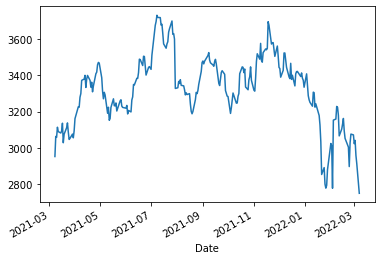

In [55]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

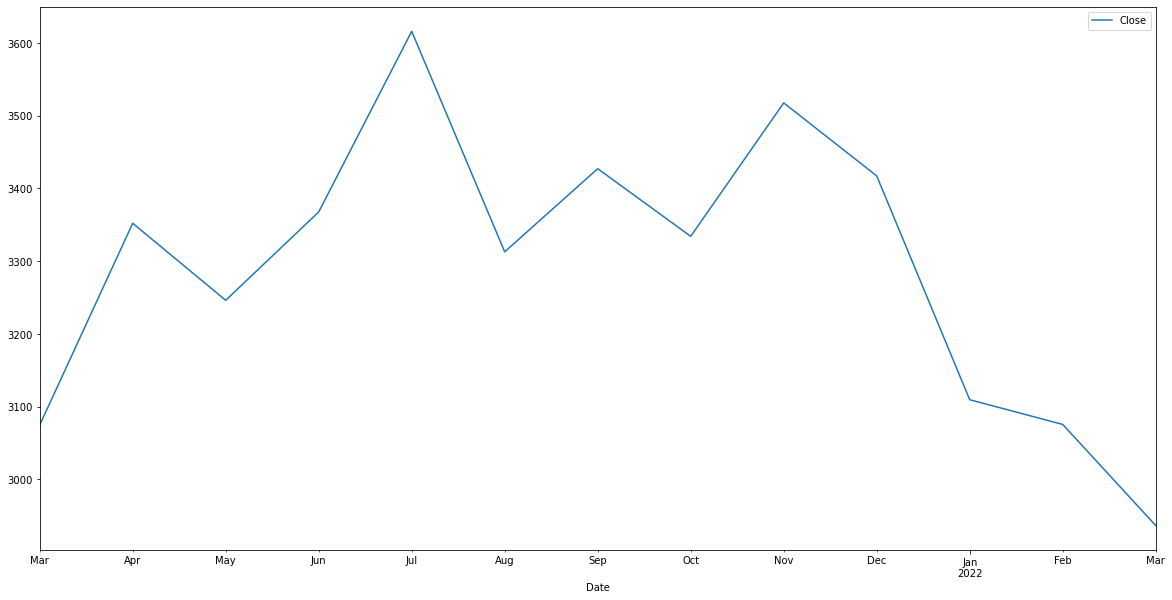

In [57]:
# resampling and taking the average monthly mean of the sentiment intensity
data.resample('M', convention='end').agg({'Close': 'mean'}).plot(figsize=(20, 10))

#### Result -  As you can observe there is a little resemlence in the stock fluctuation and the sentiment plot

## TESLA

In [59]:
tesla = vader[vader['Ticker'] == "TSLA"][['compound']]

In [60]:
tesla.resample('M', convention='end').agg({'compound': 'mean'})

,compound
Date,
2021-03-31,0.042442
2021-04-30,0.058932
2021-05-31,0.094916
2021-06-30,0.097731
2021-07-31,0.105075
2021-08-31,0.123248
2021-09-30,0.048802
2021-10-31,0.138547
2021-11-30,0.054550


<AxesSubplot:xlabel='Date'>

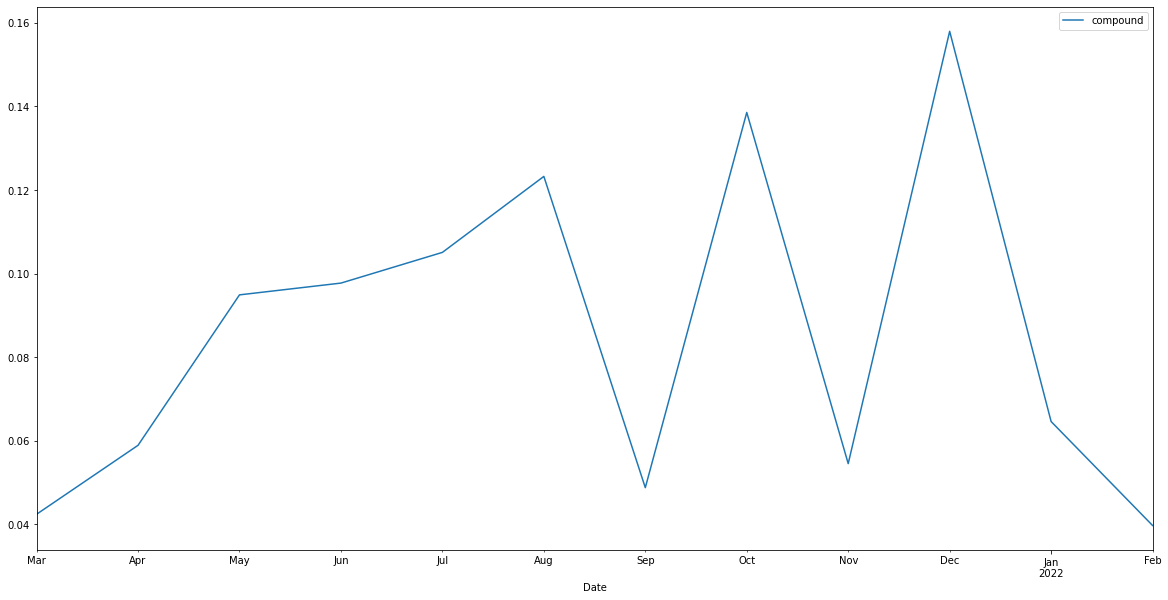

In [61]:
tesla.resample('M', convention='end').agg({'compound': 'mean'}).plot(figsize=(20, 10))

In [62]:
data = pd.read_csv('data_tesla.csv',index_col=0)

In [63]:
data['Date'] = pd.to_datetime(data['Date'])

In [64]:
data.set_index('Date',inplace = True)

<AxesSubplot:xlabel='Date'>

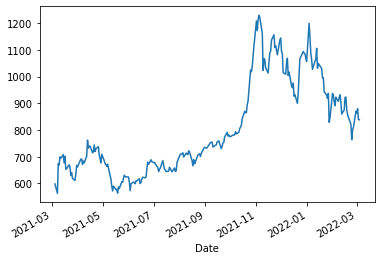

In [65]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

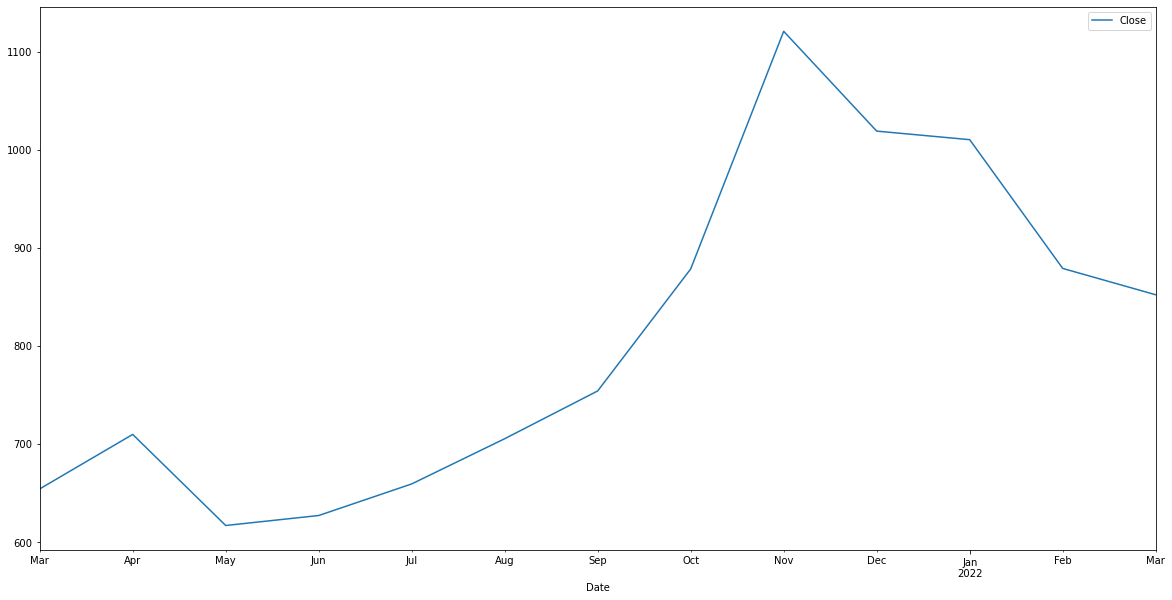

In [66]:
data.resample('M', convention='end').agg({'Close': 'mean'}).plot(figsize=(20, 10))

####  Conclusion - As we can observe a positive resemblance between the stock closing pattern and the sentiment resampling.
####  Next steps - the trend and prediction can be improved using much larger dataset.